# Data Mining Assignment - Census
### Predict whether income exceeds 50K/yr based on census data.

### Assignment Group 093

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn import preprocessing as prep
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
#from sklearn.preprocessing import LabelEncoder

#pip install numpy
#pip install pandas
#pip install matplotlib
#pip install seaborn
#pip install scikit-learn
#pip install pickle5
#pip install KModes

### Load Data

In [97]:
df = pd.read_csv("adult.data",names = ["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Maritial-Status",
            "Occupation", "Relationship", "Race", "Sex", "Capital-Gain", "Capital-Loss",
            "Hours-per-week", "Native-Country", "Target"] ,
        sep= r'\s*,\s*', engine= 'python', na_values= "?")
#x = df.iloc[:,:-1].values # data set for learning
#y = df.iloc[:,-1]. values # Value to be predicted
df.columns = ["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Maritial-Status",
            "Occupation", "Relationship", "Race", "Sex", "Capital-Gain", "Capital-Loss",
            "Hours-per-week", "Native-Country", "Target"]
df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Maritial-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Native-Country,Target
0,NaN,NaN,77516,NaN,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Exploratory Analysis

Education


<AxesSubplot:>

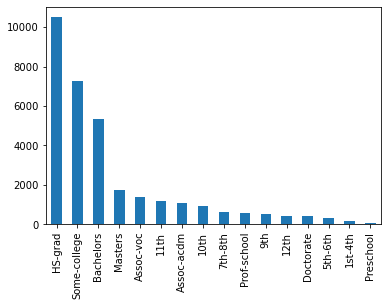

In [98]:
print("Education")
df.iloc[:,3].value_counts().plot(kind = "bar")

C:\Users\susha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Workclass', ylabel='count'>

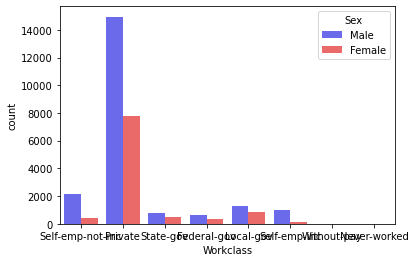

In [111]:
sns.countplot(df['Workclass'], hue='Sex', data=df, palette='seismic')


<AxesSubplot:xlabel='Education', ylabel='Education-Num'>

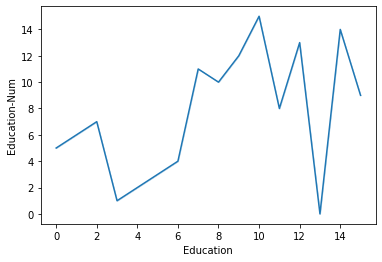

In [87]:
sns.lineplot(data=df, x=df.iloc[:,3], y=df.iloc[:,4])

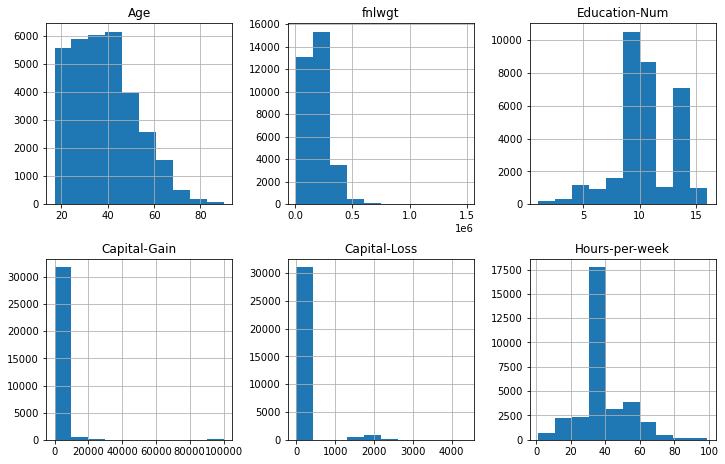

In [102]:
df.hist(figsize=(12,12), layout=(3,3), sharex=False);

### Preprocessing Data

In [83]:
#df.drop("Target", axis = 1, inplace = True)
#df.drop("Sex", axis = 1, inplace = True)

imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer.fit(df)
df=imputer.transform(df)
df = pd.DataFrame(imputer.fit_transform(df))

df.columns = ["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Maritial-Status",
            "Occupation", "Relationship", "Race", "Sex", "Capital-Gain", "Capital-Loss",
            "Hours-per-week", "Native-Country", "Target"]
df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Maritial-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Native-Country,Target
0,19,3,2671,11,12,4,0,1,4,1,25,0,39,38,0
1,33,5,2926,9,12,2,3,0,4,1,0,0,12,38,0
2,21,3,14086,11,8,0,5,1,4,1,0,0,39,38,0
3,36,3,15336,1,6,2,5,0,2,1,0,0,39,38,0
4,11,3,19355,9,12,2,9,5,2,0,0,0,39,4,0


In [32]:
df = df.apply(prep.LabelEncoder().fit_transform)
df

,Age,Workclass,fnlwgt,Education,Education-Num,Martial-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Native-Country,Target
0,19,3,2671,11,12,4,0,1,4,1,25,0,39,38,0
1,33,5,2926,9,12,2,3,0,4,1,0,0,12,38,0
2,21,3,14086,11,8,0,5,1,4,1,0,0,39,38,0
3,36,3,15336,1,6,2,5,0,2,1,0,0,39,38,0
4,11,3,19355,9,12,2,9,5,2,0,0,0,39,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,3,16528,7,11,2,12,5,4,0,0,0,37,38,0
32557,23,3,8080,11,8,2,6,0,4,1,0,0,39,38,1
32558,41,3,7883,11,8,6,0,4,4,0,0,0,39,38,0
32559,5,3,12881,11,8,4,0,3,4,1,0,0,19,38,0


### Algorithm for clustering 

#### K-Means 

,Age,Education,Occupation,Relationship,Race
0,19,11,0,1,4
1,33,9,3,0,4
2,21,11,5,1,4
3,36,1,5,0,2
4,11,9,9,5,2


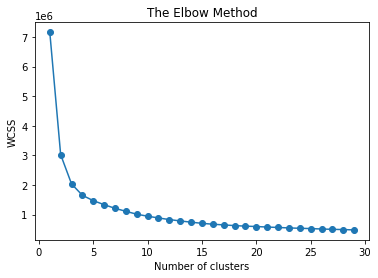

In [60]:
df3 = df[['Age', 'Education', 'Occupation', 'Relationship', 'Race']].copy()

### Using the elbow method to find the optimal number of clusters

wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


Silhouette Score: 0.37428805837803436


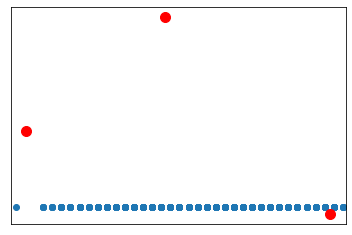

[0 1 0 ... 1 2 1]


In [112]:


kmeans_model = KMeans(n_clusters = 3, random_state = 1).fit(df3)
labels = kmeans_model.labels_
sc1 = silhouette_score(df3, labels, metric = 'euclidean')

print("Silhouette Score:",sc1)

pred_y = kmeans_model.fit_predict(df3)
df3.head()
plt.scatter(df3['Age'], df3['Education'])
plt.scatter('Age', 'Education')
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s=100, c='red')
plt.show()

print(pred_y)


#### K modes

In [66]:
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(df3)
labels = kmeans_model.labels_
sc2 = silhouette_score(df3, labels, metric = 'euclidean')

print("Silhouette Score: %0.3f" %sc2)

print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(df3, labels))
print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(df3, labels))

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7565, cost: 90259.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 6433, cost: 86782.0
Run 2, iteration: 2/100, moves: 4737, cost: 86782.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 6721, cost: 91401.0
Run 3, iteration: 2/100, moves: 633, cost: 91401.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 9653, cost: 89050.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 4213, cost: 92227.0
Best run was number 2
Silhouette Score: 0.374
Calinski-Harabasz Index: 40975.740
Davies-Bouldin Index: 0.897


### Test Data

In [77]:
df_test = pd.read_csv("adult.test",
            names = [
            "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Maritial Status",
            "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
            "Hours per week", "Country", "Target"], sep= r'\s*,\s*', engine= 'python', na_values= "?")
df_test = df_test.iloc[1: , :]
df_test.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [78]:
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer.fit(df_test)
df_test=imputer.transform(df_test)
df_test = pd.DataFrame(imputer.fit_transform(df_test))
df_test.columns = ["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Maritial-Status",
            "Occupation", "Relationship", "Race", "Sex", "Capital-Gain", "Capital-Loss",
            "Hours-per-week", "Native-Country", "Target"]

df_test.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Native-Country,Target
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
4,18,Private,103497.0,Some-college,10.0,Never-married,Prof-specialty,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [79]:
df_test = df_test.apply(prep.LabelEncoder().fit_transform)
df_test

,Age,Workclass,fnlwgt,Education,Education-Num,Martial-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Native-Country,Target
0,8,3,8931,1,6,4,6,3,2,1,0,0,39,37,0
1,21,3,1888,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,11540,7,11,2,10,0,4,1,0,0,39,37,1
3,27,3,5146,15,9,2,6,0,2,1,90,0,39,37,1
4,1,3,2450,15,9,4,9,3,4,0,0,0,29,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,22,3,8476,9,12,0,9,1,4,0,0,0,35,37,0
16277,47,3,11301,11,8,6,9,2,2,1,0,0,39,37,0
16278,21,3,12014,9,12,2,9,0,4,1,0,0,49,37,0
16279,27,3,1718,9,12,0,0,3,1,1,75,0,39,37,0


In [80]:
pred_y = kmeans_model.fit_predict(df_test)
pred_y

array([2, 1, 2, ..., 2, 1, 0])